SMOTE with Imbalance Data using imblearn module

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
data = pd.read_csv("C:\\Users\gurun\Desktop\VAC Predictive Analysis Python\Module 2 More into Python\\1 Handling Data Imbalance\creditcard.csv")
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Getting the count or frequency of Fraud and Non-Fraud classes.

0    284315
1       492
Name: Class, dtype: int64

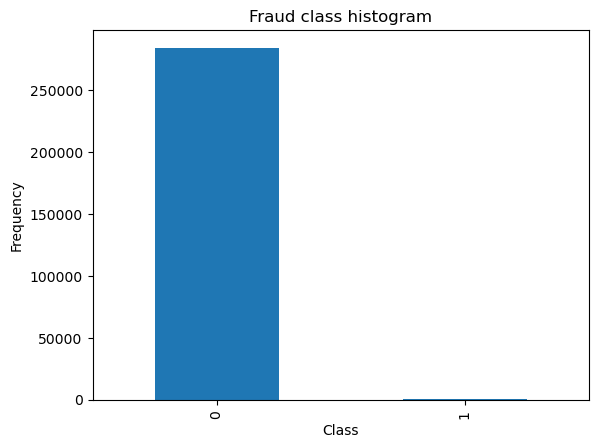

In [4]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()

### We can infer that there is an imbalance in the data because the no. of Fraud cases are way much lesser then no. of Non-Fraud Cases.

#### Also, looking at the dataframe, the values Amount column are scaling equally with the values of other columns. And Time column may not be necessary. So we do Feature Scaling of Amount column.

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


First, the code imports the StandardScaler class from the sklearn.preprocessing module. This class is a transformer that scales and standardizes features by removing the mean and scaling to unit variance.

Next, a new column called normAmount is created in the data dataframe by fitting and transforming the Amount column using the StandardScaler object. The reshape(-1, 1) method is used to convert the 1-dimensional array of Amount values into a 2-dimensional array, which is the expected format for StandardScaler.

Finally, the Time and Amount columns are dropped from the data dataframe using the drop() method with the axis=1 argument, which specifies that columns should be dropped rather than rows.

The resulting data dataframe has the same number of rows as the original, but with two fewer columns (Time and Amount) and one new column (normAmount). This is a common preprocessing step to prepare the data for machine learning models, as it removes unnecessary or irrelevant features and scales the remaining features to a similar range to avoid issues with varying units and magnitudes.

### After Feature Scaling, now we split the data into Independent Variables (x) and Dependent Variables (y). 

In [17]:
X = np.array(data.iloc[:, data.columns != 'Class']) #Independent Variables
y = np.array(data.iloc[:, data.columns == 'Class']) #Dependent Variables
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 29)
Shape of y: (284807, 1)


### Using imblearn library, we will handle the data imbalance by over-sampling the minority class (Fraud Cases) using SMOTE. 
### There is ADASYN as well using which we can do the over-sampling of minority class.

In [11]:
#Installing necessary library
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


### SMOTE for Over-sampling of minority class

#### First we split the data into Train-set and Test-set using train_test_split funtcion from sklearn.model_selection library

In [12]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443, 1)


### Now Over-sampling of minority class is done using fit_resample() method of an instance of SMOTE class. It is performed only in Train Set

In [16]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 

After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


The code snippet provided involves using the SMOTE (Synthetic Minority Over-sampling Technique) algorithm for performing oversampling of the minority class in a binary classification problem.

SMOTE is a widely-used technique for dealing with imbalanced datasets, where the number of instances in one class is significantly smaller than the other. It works by generating synthetic samples from the minority class, which are similar to the existing instances, and adding them to the training set.

In the code, the SMOTE function is initialized with a random_state value of 2. This parameter is used to ensure that the results obtained are reproducible, i.e., running the same code with the same random_state value will produce the same output.

The fit_resample method is then used to perform oversampling on the training data (X_train and y_train), where X_train is the feature matrix and y_train is the corresponding target labels. The ravel() method is used to convert the y_train array into a 1D array.

The fit_resample method returns the oversampled feature matrix and target labels, which are assigned to X_train_res and y_train_res, respectively. These oversampled datasets can then be used for training a classifier to improve the model's performance on the minority class.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

Here is a detailed explanation of each line of the code snippet you provided, along with simple examples to illustrate the concepts:

`from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report`

The first line imports the GridSearchCV class from the model_selection module of scikit-learn library. The second line imports the LogisticRegression class from the linear_model module. The third line imports several metrics that will be used to evaluate the performance of the model later.

`parameters = {
    'C': np.linspace(1, 10, 10)
             }`
             
This line creates a dictionary that contains a range of values for the regularization parameter C of the logistic regression model. The linspace() method from numpy generates a sequence of 10 numbers between 1 and 10 (inclusive) that are evenly spaced. In this example, the values for C will range from 1 to 10 with equal increments.

`lr = LogisticRegression()`

This line creates an instance of the logistic regression model. By default, it uses l2 regularization with a regularization strength of 1.0.

`clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)`

This line creates an instance of the GridSearchCV class with the following parameters:

lr: The logistic regression model instance we created earlier.
parameters: The dictionary containing the parameter grid that will be used for hyperparameter tuning.
cv=5: The number of folds to use for cross-validation during the hyperparameter tuning process. In this case, we are using 5-fold cross-validation.
verbose=5: The verbosity level of the output during the hyperparameter tuning process. In this case, we will get detailed output at every iteration of the grid search.
n_jobs=3: The number of CPU cores to use for parallelization. In this case, we are using 3 cores.

`clf.fit(X_train_res, y_train_res.ravel())`

This line fits the GridSearchCV object to the training data. The fit() method performs the hyperparameter tuning by running cross-validation on all combinations of the parameters in the grid. The oversampled training data (X_train_res and y_train_res.ravel()) are used for this process.

The best hyperparameters are selected based on the chosen scoring metric (which defaults to accuracy for classification tasks). Once the hyperparameters are selected, a new logistic regression model is trained using the best parameters on the entire training set, including both the original and oversampled data.

The best hyperparameters can be accessed using the best_params_ attribute of the GridSearchCV object, like so: clf.best_params_.

Once the hyperparameters are obtained, they can be used to train a final logistic regression model on the original training data (without oversampling), and the model's performance can be evaluated using the test set. The metrics imported from scikit-learn, such as confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, and classification_report, can be used to evaluate the performance of the model.

In [21]:
clf.best_params_

{'C': 9.0}